## Global

### Big file

In [24]:
# fileName = '/volatile/halld/home/dbarton/pipkslamb/flatten/fall2018/tree_pipkslamb__B4_M16_M18_FSflat.root'
fileName = '/volatile/halld/home/dbarton/pipkslamb/data/fall2018/flatten/tree_pipkslamb__B4_M16_M18_FSflat_Spr-Fa18.root'
MCfileName = '/volatile/halld/home/dbarton/pipkslamb/mc/genamp2/fall2018_signal_man-t/root/trees/flatten/tree_pipkslamb__B4_M16_M18_gen_amp_V2_FSflat_Spr-Fa2018.root'
treeName = 'ntFSGlueX_100000000_1100'
metaData = 'Spring & Fall 2018. FSFlat.  B4__M16_M18'


### Little file

In [13]:
fileName = '/volatile/halld/home/dbarton/pipkslamb/data/fall2018/flatten/tree_pipkslamb__B4_M16_M18_FSFlat_small.root'
treeName = 'ntFSGlueX_100000000_1100'

### Startup

In [25]:
import ROOT
from pyamptools import atiSetup
import os
os.chdir("/work/halld/home/dbarton/gluex/KShortPipLambda")
os.listdir()
atiSetup.setup(globals(), use_fsroot=True)

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

# DEFINE VARIABLES CORRESPOONDING TO THE INDICES
DecayingLambda = "1"
Proton = "1a"
PiMinus2 = "1b"
DecayingKShort = "2"
PiPlus2 = "2a"
PiMinus1 = "2b"
PiPlus1 = "3"
NegOne = "-1.*"


################################ MANDELSTAM t VARIABLES ################################

####### 1D t variables #######
mand_t = f"{NegOne}MASS2(GLUEXTARGET,-{DecayingLambda})"
mand_t_k = f"{NegOne}MASS2(GLUEXBEAM,-{DecayingKShort})"
mand_t_pi = f"{NegOne}MASS2(GLUEXBEAM,-{PiPlus1})"
mand_t_kpi = f"{NegOne}MASS2(GLUEXBEAM,-{DecayingKShort},-{PiPlus1})"

def mand_t0(I, J):
    return f"MASS2({I},{J}) - 2*(ENERGY({I})*ENERGY({J}) - MOMENTUM({I})*MOMENTUM({J}))"

mand_tPrime_kpi = f"{mand_t_kpi} - ({mand_t0(DecayingKShort, PiPlus1)})"
# mand_tPrime = 
# mand_tPrime_k =
# mand_tPrime_pi = 

####### 2D t variables #######
mand_t_kVSkpi = f"{mand_t_k}:{mand_t_kpi}"
mand_t_piVSkpi = f"{mand_t_pi}:{mand_t_kpi}"

mand_t0_kVSkpi = f"{mand_t_k}:{mand_t_kpi}"
mand_t0_piVSkpi = f"{mand_t_pi}:{mand_t_kpi}"

mand_tPrime_kVSkpi = f"{mand_t_k}:{mand_t_kpi}"
mand_tPrime_piVSkpi = f"{mand_t_pi}:{mand_t_kpi}"

########################################################################################

# DEFINE CUTS
ROOT.FSCut.defineCut("flightSigLambda","VeeLP1>5.0")
ROOT.FSCut.defineCut("flightSigKShort","VeeLP2>5.0") 
ROOT.FSCut.defineCut("chi2DOF","Chi2DOF","0.0","3.0")
ROOT.FSCut.defineCut("unusedE","EnUnusedSh","0.0","0.1") # UnusedEnergy (unused "shower"? energy)
ROOT.FSCut.defineCut("unusedTracks","NumUnusedTracks<1") # No unused tracks
ROOT.FSCut.defineCut("coherentPeak","EnPB","8.2","8.8") # Coherent peak: 8.2 < E_beam < 8.8
ROOT.FSCut.defineCut("constrainLambda",f"MASS({Proton},{PiMinus2})","1.1","1.132", "1.08", "1.1", "1.132", "1.22")
ROOT.FSCut.defineCut("constrainKShort",f"MASS({DecayingKShort})","0.49","0.51", "0.0", "0.49", "0.51", "1.0")
ROOT.FSCut.defineCut("constrainKSTAR892",f"MASS({DecayingKShort},{PiPlus1})","0.85","0.95", "0.0", "0.85", "0.95", "1.0")
ROOT.FSCut.defineCut("constrainKSTAR1430",f"MASS({DecayingKShort},{PiPlus1})","0.85","0.95", "0.0", "0.85", "0.95", "1.0")

# Other cuts.  ARE THESE RIGHT???
ROOT.FSCut.defineCut("targetZ","ZVertex","-10.0","10.0") # Target Z
ROOT.FSCut.defineCut("missingMass2Lambda","MM2Lambda","-0.1","0.1") # 

# MissingMass2 for Lambda

def gluex_style():
    style = ROOT.TStyle("GlueX", "Default GlueX Style")

    style.SetCanvasBorderMode(0)
    style.SetPadBorderMode(0)
    style.SetPadColor(0)
    style.SetCanvasColor(0)
    style.SetTitleColor(0)
    style.SetStatColor(0)

    style.SetCanvasDefW(800)
    style.SetCanvasDefH(600)

    style.SetPadBottomMargin(0.15)
    style.SetPadLeftMargin(0.15)
    style.SetPadTopMargin(0.05)
    style.SetPadRightMargin(0.08)

    style.SetStripDecimals(0)
    style.SetLabelSize(0.055, "xyz")
    style.SetTitleSize(0.06, "xyz")
    style.SetTitleFont(42, "xyz")
    style.SetLabelFont(42, "xyz")
    style.SetTitleOffset(1.2, "y")
    style.SetLabelOffset(0.01, "xyz")

    style.SetOptStat(0)
    style.SetOptTitle(0)
    style.SetHistLineWidth(2)
    style.SetHistFillColor(920)  # grey

    # style.SetPadGridX(1)
    # style.SetPadGridY(1)

    style.SetPalette(ROOT.kViridis)

    style.cd()

atiSetup| jupyter-lab called python3.9

------------------------------------------------
atiSetup| MPI is disabled
atiSetup| GPU is disabled
------------------------------------------------


atiSetup| Loading library libIUAmpTools.so ............  ON
atiSetup| Loading library libAmpTools.so ..............  ON
atiSetup| Loading library libAmpPlotter.so ............  ON
atiSetup| Loading library libAmpsDataIO.so ............  ON
atiSetup| Loading library libFSRoot.so ................  ON
atiSetup| Loading library libAmpsGen.so ...............  OFF


------------------------------------------------
------------------------------------------------

atiSetup| Saved aliases found in /app/PyAmpTools/src/pyamptools/.aliases.txt, attempting to load...
atiSetup| minor warning: Unable to alias omegapiAngles - doesn't exist under ROOT namespace
atiSetup| minor warning: Unable to alias URtypes - doesn't exist under ROOT namespace
atiSetup| minor warning: Unable to alias URConfig - doesn't exist un

### Trees

In [ ]:
def list_trees_and_branches(fileName):
    file = ROOT.TFile.Open(fileName)
    # Loop over all keys in the file
    for key in file.GetListOfKeys():
        obj = key.ReadObj()
        # Check if the object is a tree
        if isinstance(obj, ROOT.TTree):
            tree = obj
            print(f"Tree Name: {tree.GetName()}")
            print("Branches:")
            # List all branches in the tree
            branches = tree.GetListOfBranches()
            for branch in branches:
                print(f" - {branch.GetName()}")

    # Close the file
    file.Close()

list_trees_and_branches(fileName)


## Momentum transfer stuff

### t-slope

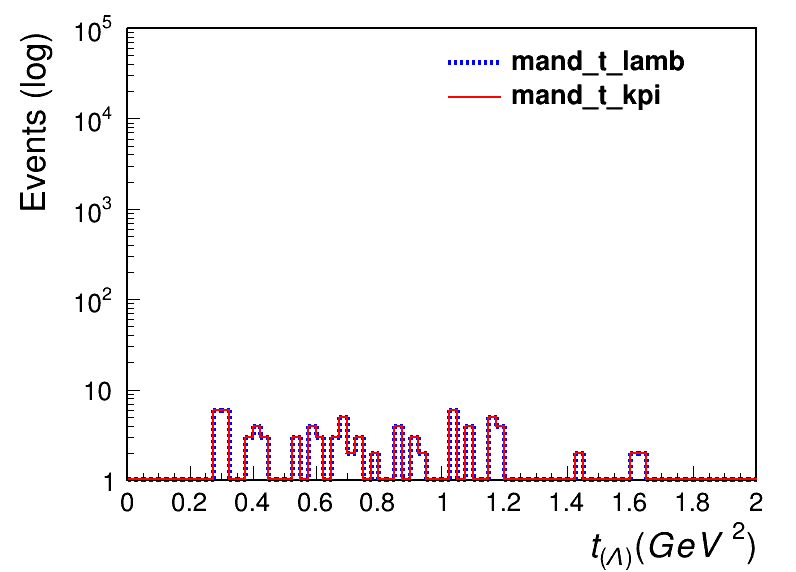

    CREATING HISTOGRAM... FSRootHist:000048   OKAY           (entries = 123)
    CREATING HISTOGRAM... FSRootHist:000049   OKAY           (entries = 123)


Info in <TCanvas::Print>: pdf file plots/mand-t_TEST.pdf has been created
Info in <TCanvas::Print>: png file plots/mand-t_TEST.png has been created


In [88]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Momentum transfer'
axisLabel = '-(p_{p} - p_{\Lambda})^{2} [GeV^{2}]'


# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    gluex_style()
    canvas = ROOT.TCanvas('c', 'c', 800, 600)

    # mand_t_kpi = f"{NegOne}MASS2(GLUEXBEAM,-{DecayingKShort}-{PiPlus1})"

    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, mand_t, "(80, 0.0, 2.0)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda,flightSigKShort)")
    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineStyle(2)
    h1.SetLineWidth(5)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle('t_{(\Lambda)} (GeV^{2})')
    h1.GetYaxis().SetTitle('Events (log)')
    h1.GetYaxis().SetRangeUser(1.,10E+04)
    h1.Draw('hist')

    h2 = ROOT.FSHistogram.getTH1F(fileName, treeName, mand_t_kpi, "(80, 0.0, 2.0)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda,flightSigKShort)")
    h2.SetTitle(plotTitle)
    h2.SetStats(False)
    h2.SetLineColor(ROOT.kRed)
    h2.GetXaxis().SetTitle('t_{(K_{s} \pi^{+})} (GeV^{2})')
    h2.GetYaxis().SetTitle('Events (log)')
    h2.GetYaxis().SetRangeUser(1.,10E+04)
    h2.Draw('same, hist')

    # exp = ROOT.TF1("exp","expo(3)",0.0,2.0) # functionLabel, function, x_min, x_max
    # # exp.SetParName(3, "exp_offset")
    # # exp.SetParName(4, "exp_decay")
    # exp.SetParameter(3, 4.42)
    # exp.SetParameter(4, -1.30)
    # exp.SetLineColor(ROOT.kRed)
    # exp.SetLineWidth(2)
    # exp.SetLineStyle(2)
    # exp.Draw('same')
    
    legend1 = ROOT.TLegend(0.55, 0.80, 0.92, 0.92) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1,'mand_t_lamb', 'l')
    legend1.AddEntry(h2,'mand_t_kpi', 'l')
    # legend1.AddEntry(exp,'Plot: exp^{#alpha #times t} (not a fit)', 'l')
    legend1.Draw('same')

    img_path = 'plots/mand-t_TEST'
    canvas.SetLogy()
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    # # print value for parameter [3] of exp function:
    # print(exp.GetParameter(3))
    # print(exp.GetParameter(4))
    os.remove(img_path + '.png')

plot_hist()

### 2D t plots

In [106]:
# testing function

# def mand_t0(I, J):
#     t0 =  f"MASS2({I},{J}) - 2*(ENERGY({I})*ENERGY({J}) - MOMENTUM({I})*MOMENTUM({J}))"
#     return t0

# mand_t0(DecayingKShort, PiPlus1)


def mand_t0(I, J, entry=0):
    expr = f"MASS2({I},{J}) - 2*(ENERGY({I})*ENERGY({J}) - MOMENTUM({I})*MOMENTUM({J}))"
    
    # Use global fileName and treeName
    file = ROOT.TFile.Open(fileName)
    tree = file.Get(treeName)
    
    formula = ROOT.TTreeFormula("mand_t0_formula", expr, tree)
    tree.GetEntry(entry)
    return formula.EvalInstance()

mand_t0(2, 3)


6.9529925766749e-310

Error in <TTreeFormula::Compile>:  Bad numerical expression : "MASS2(2,3)"


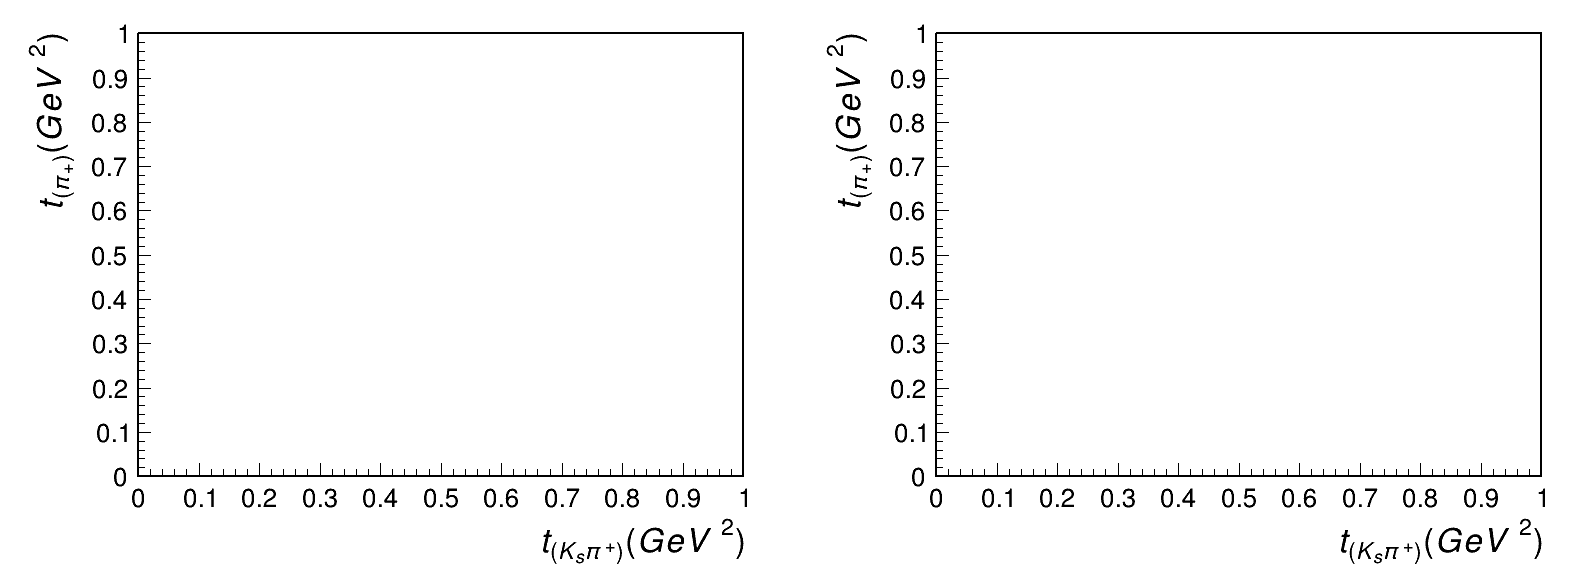

    CREATING HISTOGRAM... FSRootHist:000047   !!BAD_VAR!!    (entries = 0)
    FOUND HISTOGRAM...    FSRootHist:000047   !!BAD_VAR!!    (entries = 0)


Info in <TCanvas::Print>: pdf file plots/mand-t_VARIOUS_TEST.pdf has been created
Info in <TCanvas::Print>: png file plots/mand-t_VARIOUS_TEST.png has been created


In [87]:
from IPython.display import Image, display
latex = ROOT.TLatex()

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    gluex_style()
    ROOT.FSHistogram.clearHistogramCache()
    canvas = ROOT.TCanvas('c', 'c', 1600, 600)  # Wider canvas
    canvas.Divide(2, 1)  # 2 columns, 1 row
    canvas.SetLeftMargin(0.15)
    canvas.SetRightMargin(0.15)

    # MASS2(y-axis1,y-axis2):MASS2(x-axis1,x-axis2), "x_bins, x_min, x_max, y_bins, y_min, y_max"
    # chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda,flightSigKShort,constrainKShort,constrainLambda

    canvas.cd(1)
    # h1 = ROOT.FSHistogram.getTH2F(fileName, treeName, mand_t_kVSkpi, "(100, 0.0, 1.0, 100, 0.0, 1.0)", "CUT()")
    h1 = ROOT.FSHistogram.getTH2F(fileName, treeName, mand_tPrime_kpi, "(100, 0.0, 1.0, 100, 0.0, 1.0)", "CUT()")
    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.GetXaxis().SetTitle('t_{(K_{s} \pi^{+})} (GeV^{2})')
    h1.GetYaxis().SetTitle('t_{(K_{s})} (GeV^{2})')
    h1.Draw('colz')

    canvas.cd(2)
    # h2 = ROOT.FSHistogram.getTH2F(fileName, treeName, mand_t_piVSkpi, "(100, 0.0, 1.0, 100, 0.0, 1.0)", "CUT()")
    h2 = ROOT.FSHistogram.getTH2F(fileName, treeName, mand_tPrime_kpi, "(100, 0.0, 1.0, 100, 0.0, 1.0)", "CUT()")
    h2.SetTitle(plotTitle)
    h2.SetStats(False)
    h2.GetXaxis().SetTitle('t_{(K_{s} \pi^{+})} (GeV^{2})')
    h2.GetYaxis().SetTitle('t_{(\pi_{+})} (GeV^{2})')
    h2.Draw('colz')
    
    img_path = 'plots/mand-t_VARIOUS_TEST'
    canvas.Update()
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

## Other

### Beam energy

In [ ]:
from IPython.display import Image, display

plotTitle = 'Beam energy'
plot2Title = 'Beam energy measured'
axisLabel = 'Beam energy [GeV]'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

canvas = ROOT.TCanvas('c', 'c', 800, 600)
    
h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, "beam_e", "(80, 0.0, 14.0)", "")
h1.SetStats(False)
h1.SetLineColor(ROOT.kBlue)
h1.GetXaxis().SetTitle(axisLabel)
h1.GetYaxis().SetTitle('Events')
h1.Draw()

h2 = ROOT.FSHistogram.getTH1F(fileName, treeName, "beam_e_measured", "(80, 0.0, 14.0)", "")
h2.SetStats(False)
h2.SetMarkerStyle(24)
h2.SetMarkerColor(ROOT.kRed)
h2.GetXaxis().SetTitle(axisLabel)
h2.GetYaxis().SetTitle('Events')
h2.Draw('p same')
    
legend1 = ROOT.TLegend(0.7, 0.9, 0.9, 0.75)
# legend1.AddEntry(h1.GetValue(), plotTitle, 'l')
# legend1.AddEntry(h2.GetValue(), plot2Title, 'p')
legend1.Draw('same')

img_path = 'plots/beam_e.png'
canvas.SaveAs(img_path)
canvas.Close()
display(Image(filename=img_path))

### Flight sig.

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = '\gamma p \\rightarrow K_{s} \pi^{+} \Lambda'
axisLabel = 'Mass (K_{s})'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)



def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    ROOT.FSHistogram.clearHistogramCache()

    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, "VeeLP1", "(100, -5.0, 40.0)", "")
                                  
    # h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort})", "(80, 0.45, 0.55)", "CUT(flightSigKShort)&&MAXEVENTS==10000")


    h1.SetTitle("")
    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel + ' [GeV/c^{2}]')
    h1.GetYaxis().SetTitle('Events')
    h1.Draw('')

    legend1 = ROOT.TLegend(0.60, 0.80, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, ' ks flightSig variable', 'l')

    legend1.Draw('same')

    img_path = 'plots/VeeLP1'
    # canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    # os.remove(img_path + '.png')

plot_hist()

### Chi2/DOF 2D

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Chi2/DOF'
axisLabel = 'Chi2/DOF'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)

    h1 = ROOT.FSHistogram.getTH2F(fileName, treeName, "Chi2DOF:Event", "(60,0.0,155000000.0,60,0.0,10.0)", "")

    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    # h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.GetYaxis().SetTitle('Events')
    h1.Draw('colz')
    
    legend1 = ROOT.TLegend(0.60, 0.80, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, plotTitle + ' no cuts', 'l')
    legend1.Draw('same')

    img_path = 'plots/Chi2DOF-Event'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### Chi2/DOF 1D

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Chi2/DOF'
axisLabel = 'Chi2/DOF'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)

    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, "chi2DOF", "(80,0.0,10.0)", "CUT()")

    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.GetYaxis().SetTitle('Events')
    h1.Draw()
    
    legend1 = ROOT.TLegend(0.60, 0.80, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, plotTitle + ' no cuts', 'l')
    legend1.Draw('same')

    img_path = 'plots/Chi2DOF'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### Functions

In [ ]:
### FSROOT #####

# defineGauss = ROOT.FSFitUtilities.createFunction(ROOT.FSFitGAUS("gausFunction",0.0,20.0))
 
# ROOT.FSFitUtilities.createFunction(ROOT.FSFitGAUS("gausFunction",0.0,20.0))
# ROOT.FSFitUtilities.setParameter("gausFunction:N",10.0) # amplitude?
# ROOT.FSFitUtilities.setParameter("gausFunction:M",10.0)
# ROOT.FSFitUtilities.setParameter("gausFunction:W",10.0)
# ROOT.FSFitUtilities.createFunction("gf", "gausFunction")
# ROOT.FSFitUtilities.getTF1("gf", "gausFunction")


### cpp #####

# std::unique_ptr<TF1> bw = std::make_unique<TF1>("bw", "breitwigner(0)", 1.2, 1.7); # alt. func. "BreitWigner(x, [4], [5])"
# bw->SetParName(0, "bw_amplitude");
# bw->SetParName(1, "bw_mass");
# bw->SetParName(2, "bw_width");

# bw->SetParameter(0, fitCombined->GetParameter("bw_amplitude")); // 
# bw->SetParameter(1, fitCombined->GetParameter("bw_mass")); // 
# bw->SetParameter(2, fitCombined->GetParameter("bw_width")); // 
# bw->SetLineColor(kCyan);
# bw->SetLineWidth(2);
# bw->SetLineStyle(2);

# bw->Draw("same");

### PYTHON #####

    # fb = ROOT.TF1("fb","gaus(0)",0.3,0.7)
    # fb.SetParName(0, "gaus_amplitude")
    # fb.SetParName(1, "gaus_mean")
    # fb.SetParName(2, "gaus_width")
    # fb.SetParameter("gaus_amplitude", 680)
    # # fb.SetParameter("gauss_amplitude", h1.GetMaximum())
    # fb.SetParameter("gaus_mean", 0.497)
    # fb.SetParameter("gaus_width", 0.01)
    # fb.SetLineColor(ROOT.kRed)
    # fb.SetLineWidth(2)
    # fb.SetLineStyle(2)
    # fb.Draw("same")
        
    # fb.SetParLimits(0, 0, 100000)
    # fb.SetParLimits(1, 0.49, 0.51)
    # fb.SetParLimits(2, 0.0, 0.05)

    # fb.SetNpx(1000)
    # fb.SetRange(0.45, 0.55)
    # fb.SetParameter(0, h1.GetMaximum())

### Functions 2

In [ ]:
canvas = ROOT.TCanvas('c', 'c', 800, 600)
canvas.SetLeftMargin(0.15)

fb = ROOT.TF1("fb","gaus(0)",0.3,0.7) # functionLabel, function, x_min, x_max
fb.SetParName(0, "gaus_amplitude")
fb.SetParName(1, "gaus_mean")
fb.SetParName(2, "gaus_width")
fb.SetParameter("gaus_amplitude", 0.7)
# fb.SetParameter("gauss_amplitude", h1.GetMaximum())
fb.SetParameter("gaus_mean", 0.497)
fb.SetParameter("gaus_width", 0.05)
fb.GetXaxis().SetTitle("Mass (GeV/c^{2})")
fb.GetYaxis().SetTitle("Events")
fb.SetTitle("Gaussian Function")
# fb.SetRange(0.4, 0.6)
# fb.SetNpx(1000)
fb.SetLineColor(ROOT.kRed)
fb.SetLineWidth(2)
fb.SetLineStyle(2)
fb.Draw()

img_path = 'plots/bwTEST_m'
canvas.SaveAs(img_path + '.pdf')
canvas.SaveAs(img_path + '.png')
canvas.Close()
display(Image(filename=img_path + '.png'))
os.remove(img_path + '.png')


## Mass plots

### KShort

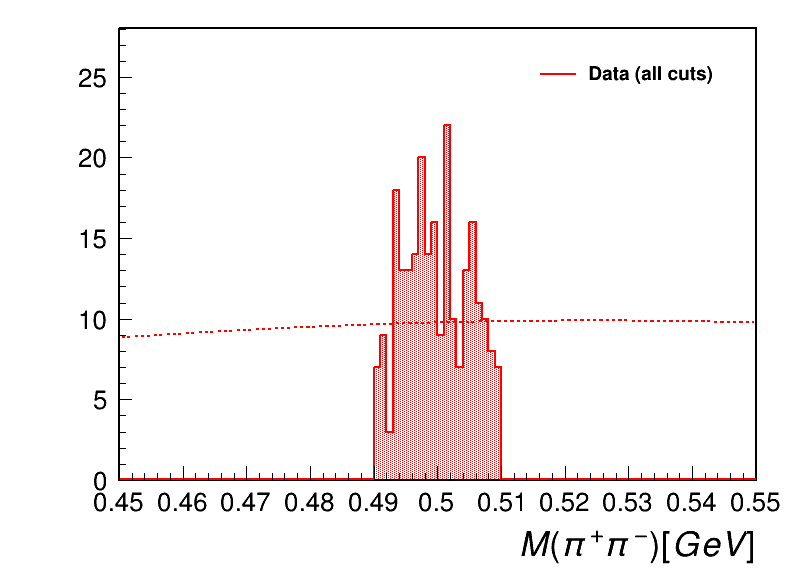

    CREATING HISTOGRAM... FSRootHist:000007   OKAY           (entries = 240)
 FCN=44.5786 FROM MIGRAD    STATUS=CONVERGED     713 CALLS         714 TOTAL
                     EDM=9.54916e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.7 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  gaus1_amplitude   9.89729e+00   1.02826e+00   3.60041e-03   6.64886e-04
   2  gaus1_mean   5.24303e-01   1.23863e-01   3.50577e-04  -8.00892e+00
   3  gaus1_width   1.55897e-01   2.98706e-01   8.45275e-04   3.31931e+00
   4  gaus2_amplitude   3.75000e+02   1.41421e+00  -0.00000e+00   0.00000e+00
   5  gaus2_mean   4.97600e-01   1.41421e+00  -0.00000e+00   0.00000e+00
   6  gau2s_width   0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00


Info in <TCanvas::Print>: pdf file plots/ks_m_fit_TEST1.pdf has been created
Info in <TCanvas::Print>: png file plots/ks_m_fit_TEST1.png has been created


In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Data'
axisLabel = 'M(\pi^{+} \pi^{-}) [GeV]'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    gluex_style()
    # clear histogram cache
    ROOT.FSHistogram.clearHistogramCache() 
    
    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)


    # h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort})", "(100, 0.45, 0.55)", "CUT()")
    # h2 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort})", "(100, 0.45, 0.55)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak)")
    # h3 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort})", "(100, 0.45, 0.55)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort)")
    h4 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort})", "(100, 0.45, 0.55)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,constrainKShort)")
    # hMC = ROOT.FSHistogram.getTH1F(MCfileName, treeName, f"MASS({DecayingKShort})", "(100, 0.45, 0.55)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,constrainKShort)")
    # Tighter mass window (100, ?, ?)
    
    # h1.SetStats(False)
    # h1.SetMarkerColor(ROOT.kMagenta)
    # h1.SetMarkerStyle(4)
    # h1.SetMarkerSize(0.8)
    # h1.SetLineColor(ROOT.kMagenta)
    # h1.SetLineStyle(1)
    # h1.SetLineWidth(1)
    # h1.SetFillColor(ROOT.kMagenta)
    # h1.SetFillStyle(3002)
    # h1.GetXaxis().SetTitle(axisLabel)
    # h1.Draw('pl, hist')

    # h2.SetStats(False)
    # h2.SetLineColor(ROOT.kBlue)
    # h2.SetLineStyle(8)
    # h2.SetLineWidth(2)
    # h2.SetFillColor(ROOT.kBlue)
    # h2.SetFillStyle(3002)
    # h2.GetXaxis().SetTitle(axisLabel)
    # h2.Draw('same, hist')

    # h3.SetStats(False)
    # h3.SetMarkerColor(ROOT.kBlack)
    # h3.SetMarkerStyle(4)
    # h3.SetMarkerSize(0.8)
    # h3.SetLineColor(ROOT.kBlack)
    # h3.SetLineStyle(1)
    # h3.SetLineWidth(2)
    # h3.SetFillColor(920)
    # h3.SetFillStyle(302)
    # h3.GetXaxis().SetTitle(axisLabel)
    # h3.Draw("same,pl hist")

    h4.SetStats(False)
    h4.SetLineColor(ROOT.kRed)
    h4.SetLineStyle(1)
    h4.SetLineWidth(2)
    h4.SetFillColor(ROOT.kRed)
    h4.SetFillStyle(3002)
    h4.GetXaxis().SetTitle(axisLabel)
    h4.Draw("hist")

    # hMC.SetStats(False)
    # hMC.SetMarkerColor(ROOT.kBlue)
    # hMC.SetMarkerStyle(4)
    # hMC.SetMarkerSize(0.8)
    # hMC.SetLineColor(ROOT.kBlue)
    # hMC.SetLineStyle(8)
    # hMC.SetLineWidth(2)
    # hMC.SetFillColor(ROOT.kBlue)
    # hMC.SetFillStyle(3002)
    # hMC.GetXaxis().SetTitle(axisLabel)
    # hMC.Draw("same, pl hist")
    # hMC.Scale(2.02)

    legend1 = ROOT.TLegend(0.67, 0.82, 0.92, 0.92) # x_left, y_bottom, x_right, y_top
    # legend1.AddEntry(h1, ' Analysis launch cuts only', 'pl')
    # legend1.AddEntry(h2, ' Initial cuts', 'l')
    # legend1.AddEntry(h3, ' Initial, K_{s} flightSig', 'pl')
    # legend1.AddEntry(h4, ' Initial, K_{s} flightSig, K_{s} mass sel.', 'l')
    legend1.AddEntry(h4, ' Data (all cuts)', 'l')
    # legend1.AddEntry(hMC, ' Signal MC (all cuts)', 'pl')
    legend1.Draw('same')

    img_path = 'plots/ks_m_fit_TEST1'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### KShort FITTING gaussian

Index Name                      Value      Error
--------------------------------------------------
0     gaus1_amplitude      1764.69358   11.86620
1     gaus1_mean              0.49889    0.00005
2     gaus1_width             0.01175    0.00006
3     gaus2_amplitude       375.00000    1.41421
4     gaus2_mean              0.49760    1.41421
5     gau2s_width             0.00000    1.41421


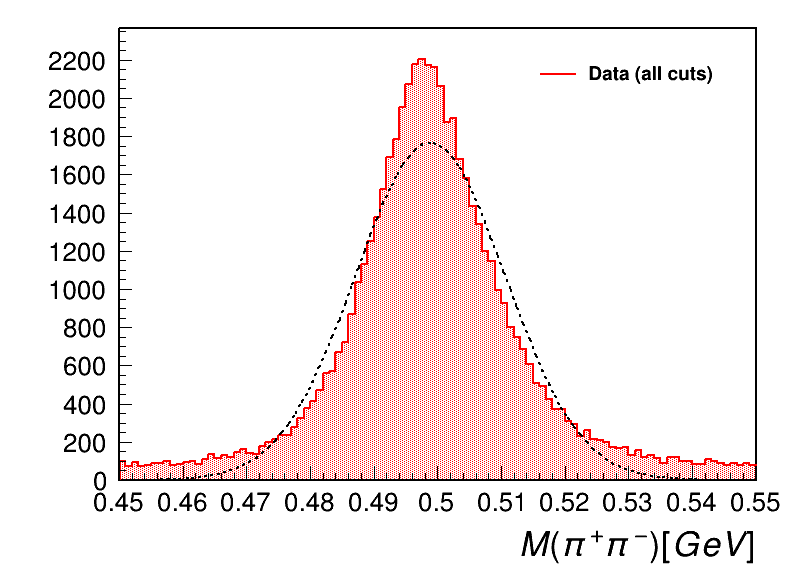

    CREATING HISTOGRAM... FSRootHist:000011   OKAY           (entries = 78809)


Info in <TCanvas::Print>: pdf file plots/ks_m_fit_gauss_v1.pdf has been created
Info in <TCanvas::Print>: png file plots/ks_m_fit_gauss_v1.png has been created


In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Data'
axisLabel = 'M(\pi^{+} \pi^{-}) [GeV]'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    gluex_style()
    # clear histogram cache
    ROOT.FSHistogram.clearHistogramCache() 
    
    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    fb = ROOT.TF1("fb","gaus(0) + gaus(3)",0.3,0.7)
    fb.SetParName(0, "gaus1_amplitude")
    fb.SetParName(1, "gaus1_mean")
    fb.SetParName(2, "gaus1_width")
    fb.SetParName(3, "gaus2_amplitude")
    fb.SetParName(4, "gaus2_mean")
    fb.SetParName(5, "gau2s_width")

    fb.SetParameter("gaus1_amplitude", 750)
    fb.SetParameter("gaus1_mean", 0.4976)
    fb.SetParameter("gaus1_width", 0.01)
    # fb.FixParameter(0, 870.5)
    # fb.FixParameter(1, 0.49823)
    # fb.FixParameter(2, 0.01008)

    fb.SetParameter("gaus2_amplitude", 375)
    fb.SetParameter("gaus2_mean", 0.4976)
    fb.SetParameter("gaus2_width", 0.01)
    # fb.FixParameter(3, 141.25)
    # fb.FixParameter(4, 0.4976)
    # fb.FixParameter(5, 0.0045)

    fb.SetLineColor(ROOT.kBlack)
    fb.SetLineWidth(2)
    fb.SetLineStyle(2)

    # fb.SetParameter("gauss_amplitude", h1.GetMaximum())

    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort})", "(100, 0.45, 0.55)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort)")
    # hMC = ROOT.FSHistogram.getTH1F(MCfileName, treeName, f"MASS({DecayingKShort})", "(100, 0.45, 0.55)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,constrainKShort)")
    # Tighter mass window (100, ?, ?)


    h1.SetStats(False)
    h1.SetLineColor(ROOT.kRed)
    h1.SetLineStyle(1)
    h1.SetLineWidth(2)
    h1.SetFillColor(ROOT.kRed)
    h1.SetFillStyle(3002)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.Draw("hist")
    h1.Fit(fb, "RQ")
    fb.Draw("same")

    # hMC.SetStats(False)
    # hMC.SetMarkerColor(ROOT.kBlue)
    # hMC.SetMarkerStyle(4)
    # hMC.SetMarkerSize(0.8)
    # hMC.SetLineColor(ROOT.kBlue)
    # hMC.SetLineStyle(8)
    # hMC.SetLineWidth(2)
    # hMC.SetFillColor(ROOT.kBlue)
    # hMC.SetFillStyle(3002)
    # hMC.GetXaxis().SetTitle(axisLabel)
    # hMC.Draw("same, pl hist")
    # hMC.Scale(2.02)

    legend1 = ROOT.TLegend(0.67, 0.82, 0.92, 0.92) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, ' Data (all cuts)', 'l')
    # legend1.AddEntry(hMC, ' Signal MC (all cuts)', 'pl')
    legend1.Draw('same')

    print(f"{'Index':<5} {'Name':<20} {'Value':>10} {'Error':>10}")
    print("-" * 50)
    for i in range(fb.GetNpar()):
        name = fb.GetParName(i)
        val = fb.GetParameter(i)
        err = fb.GetParError(i)
        print(f"{i:<5} {name:<20} {val:>10.5f} {err:>10.5f}")

    img_path = 'plots/ks_m_fit_gauss_v1'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### KShort FITTING voigtian

Index Name                      Value      Error
--------------------------------------------------
0     voigtian_amplitude     61.97326    0.27432
1     voigtian_mean           0.49869    0.00005
2     voigtian_sigma          0.00464    0.00015
3     voigtian_width          0.01435    0.00020


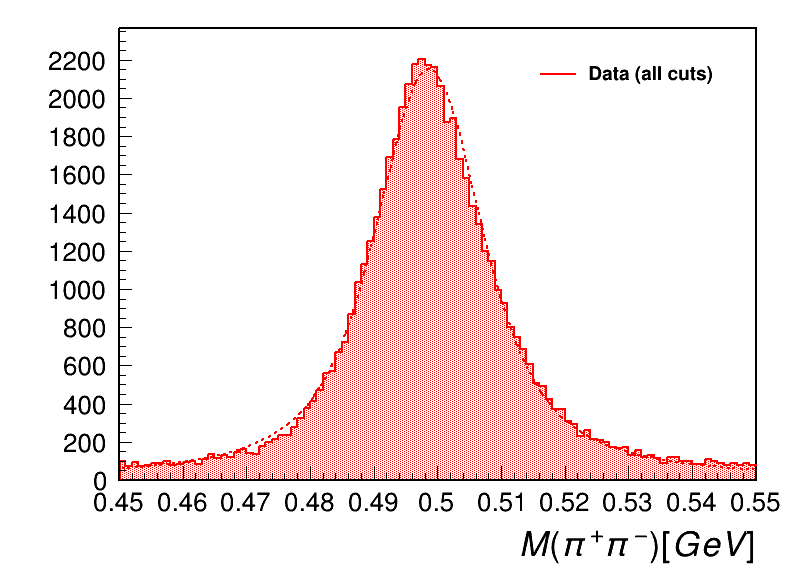

    CREATING HISTOGRAM... FSRootHist:000005   OKAY           (entries = 78809)


Info in <TCanvas::Print>: pdf file plots/ks_m_fit_VOIGTIAN_v1.pdf has been created
Info in <TCanvas::Print>: png file plots/ks_m_fit_VOIGTIAN_v1.png has been created


In [9]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Data'
axisLabel = 'M(\pi^{+} \pi^{-}) [GeV]'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    gluex_style()
    # clear histogram cache
    ROOT.FSHistogram.clearHistogramCache() 
    
    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    # Voigtian function
    voigtian = ROOT.TF1("voigtian", "[0]*TMath::Voigt(x - [1], [2], [3])", 0.45, 0.55)
    voigtian.SetParName(0, "voigtian_amplitude")
    voigtian.SetParName(1, "voigtian_mean") # 'mean' is the offset that places the mass peak at the correct position.
    voigtian.SetParName(2, "voigtian_sigma") # 'sigma' is the gaussian width (detector resolution)
    voigtian.SetParName(3, "voigtian_width") # 'width' is the breit-wigner/lorentzian width (lifetime of the particle)

    voigtian.SetParameter("voigtian_amplitude", 1.0)
    voigtian.SetParameter("voigtian_mean", 1.0)
    voigtian.SetParameter("voigtian_sigma", 1.0)
    voigtian.SetParameter("voigtian_width", 1.0)
    # voigtian.FixParameter(0, 750)
    # voigtian.FixParameter(1, 0.4976)
    # voigtian.FixParameter(2, 1.0)
    # voigtian.FixParameter(3, 0.01)

    voigtian.SetLineColor(ROOT.kRed)
    voigtian.SetLineWidth(2)
    voigtian.SetLineStyle(2)

    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort})", "(100, 0.45, 0.55)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort)")
    # hMC = ROOT.FSHistogram.getTH1F(MCfileName, treeName, f"MASS({DecayingKShort})", "(100, 0.45, 0.55)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,constrainKShort)")
    # Tighter mass window (100, ?, ?)


    h1.SetStats(False)
    h1.SetLineColor(ROOT.kRed)
    h1.SetLineStyle(1)
    h1.SetLineWidth(2)
    h1.SetFillColor(ROOT.kRed)
    h1.SetFillStyle(3002)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.Fit(voigtian, "RQ")
    h1.Draw("hist")
    voigtian.Draw("same")

    # hMC.SetStats(False)
    # hMC.SetMarkerColor(ROOT.kBlue)
    # hMC.SetMarkerStyle(4)
    # hMC.SetMarkerSize(0.8)
    # hMC.SetLineColor(ROOT.kBlue)
    # hMC.SetLineStyle(8)
    # hMC.SetLineWidth(2)
    # hMC.SetFillColor(ROOT.kBlue)
    # hMC.SetFillStyle(3002)
    # hMC.GetXaxis().SetTitle(axisLabel)
    # hMC.Draw("same, pl hist")
    # hMC.Scale(2.02)

    legend1 = ROOT.TLegend(0.67, 0.82, 0.92, 0.92) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, ' Data (all cuts)', 'l')
    # legend1.AddEntry(hMC, ' Signal MC (all cuts)', 'pl')
    legend1.Draw('same')

    print(f"{'Index':<5} {'Name':<20} {'Value':>10} {'Error':>10}")
    print("-" * 50)
    for i in range(voigtian.GetNpar()):
        name = voigtian.GetParName(i)
        val = voigtian.GetParameter(i)
        err = voigtian.GetParError(i)
        print(f"{i:<5} {name:<20} {val:>10.5f} {err:>10.5f}")

    img_path = 'plots/ks_m_fit_VOIGTIAN_v1'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### Lambda

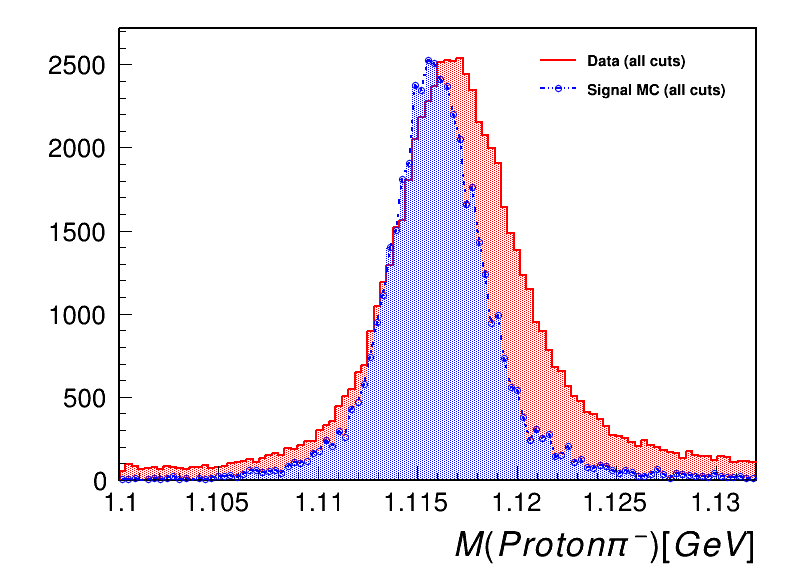

    CREATING HISTOGRAM... FSRootHist:000019   OKAY           (entries = 66406)
    CREATING HISTOGRAM... FSRootHist:000020   OKAY           (entries = 10052)


Info in <TCanvas::Print>: pdf file plots/Lambda_m_DATA-MC_man-t.pdf has been created
Info in <TCanvas::Print>: png file plots/Lambda_m_DATA-MC_man-t.png has been created


In [14]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Data: \gamma p \\rightarrow K_{s} \pi^{+} \Lambda'
axisLabel = 'M(Proton \pi^{-}) [GeV]'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    gluex_style()
    # clear histogram cache
    ROOT.FSHistogram.clearHistogramCache()
    
    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    # h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({Proton}, {PiMinus2})", "(100, 1.08, 1.28)", "CUT()")
    # h2 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({Proton}, {PiMinus2})", "(100, 1.078, 1.152)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak)")
    # h3 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({Proton}, {PiMinus2})", "(100, 1.078, 1.152)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda)")
    h4 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({Proton}, {PiMinus2})", "(100, 1.1, 1.132)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda,constrainLambda)")
    hMC = ROOT.FSHistogram.getTH1F(MCfileName, treeName, f"MASS({Proton}, {PiMinus2})", "(100, 1.1, 1.132)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda,constrainLambda)")
    # Tighter mass window (100, 1.078, 1.152)
    
    # h1.SetStats(False)
    # h1.SetMarkerColor(ROOT.kMagenta)
    # h1.SetMarkerStyle(4)
    # h1.SetMarkerSize(0.8)
    # h1.SetLineColor(ROOT.kMagenta)
    # h1.SetLineStyle(1)
    # h1.SetLineWidth(1)
    # h1.SetFillColor(ROOT.kMagenta)
    # h1.SetFillStyle(3002)
    # h1.GetXaxis().SetTitle(axisLabel)
    # h1.Draw('pl, hist')

    # h2.SetStats(False)
    # h2.SetLineColor(ROOT.kBlue)
    # h2.SetLineStyle(8)
    # h2.SetLineWidth(2)
    # h2.SetFillColor(ROOT.kBlue)
    # h2.SetFillStyle(3002)
    # h2.GetXaxis().SetTitle(axisLabel)
    # h2.Draw('same, hist')

    # h3.SetStats(False)
    # h3.SetMarkerColor(ROOT.kBlack)
    # h3.SetMarkerStyle(4)
    # h3.SetMarkerSize(0.8)
    # h3.SetLineColor(ROOT.kBlack)
    # h3.SetLineStyle(1)
    # h3.SetLineWidth(2)
    # h3.SetFillColor(920)
    # h3.SetFillStyle(302)
    # h3.GetXaxis().SetTitle(axisLabel)
    # h3.Draw("same,pl hist")

    h4.SetStats(False)
    h4.SetLineColor(ROOT.kRed)
    h4.SetLineStyle(1)
    h4.SetLineWidth(2)
    h4.SetFillColor(ROOT.kRed)
    h4.SetFillStyle(3002)
    h4.GetXaxis().SetTitle(axisLabel)
    h4.Draw("same, hist")

    hMC.SetStats(False)
    hMC.SetMarkerColor(ROOT.kBlue)
    hMC.SetMarkerStyle(4)
    hMC.SetMarkerSize(0.8)
    hMC.SetLineColor(ROOT.kBlue)
    hMC.SetLineStyle(8)
    hMC.SetLineWidth(2)
    hMC.SetFillColor(ROOT.kBlue)
    hMC.SetFillStyle(3002)
    hMC.GetXaxis().SetTitle(axisLabel)
    hMC.Draw("same, pl hist")
    hMC.Scale(4.49)

    legend1 = ROOT.TLegend(0.67, 0.82, 0.92, 0.92) # x_left, y_bottom, x_right, y_top
    # legend1.AddEntry(h1, ' Analysis launch cuts only', 'pl')
    # legend1.AddEntry(h2, ' Initial cuts', 'l')
    # legend1.AddEntry(h3, ' Initial, #Lambda flightSig', 'pl')
    # legend1.AddEntry(h4, ' Initial, #Lambda flightSig, #Lambda mass sel.', 'l')
    legend1.AddEntry(h4, ' Data (all cuts)', 'l')
    legend1.AddEntry(hMC, ' Signal MC (all cuts)', 'pl')
    legend1.Draw('same')

    img_path = 'plots/Lambda_m_DATA-MC_man-t'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### Lambda FITTING voigtian

Index Name                      Value      Error
--------------------------------------------------
0     voigtian_amplitude     22.93890    0.09358
1     voigtian_mean           1.11700    0.00002
2     voigtian_sigma          0.00172    0.00004
3     voigtian_width          0.00408    0.00006


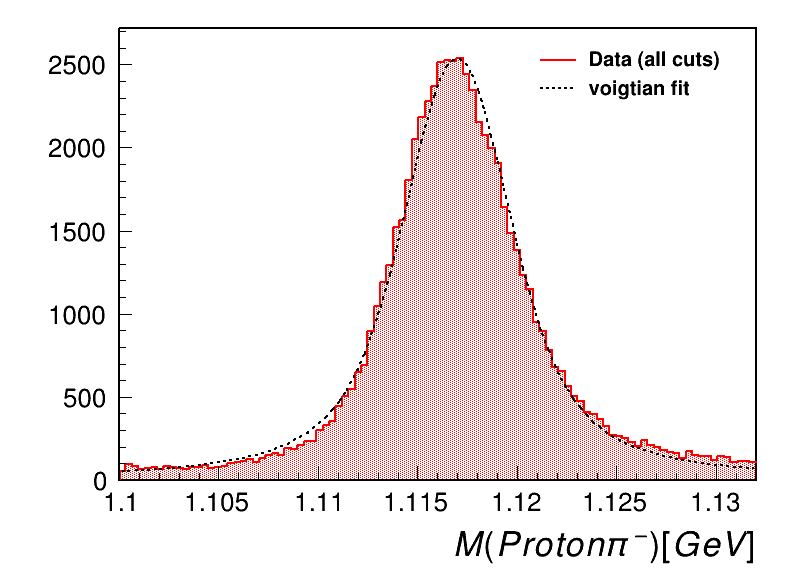

    CREATING HISTOGRAM... FSRootHist:000018   OKAY           (entries = 79956)


Info in <TCanvas::Print>: pdf file plots/Lambda_m_fit_TEST.pdf has been created
Info in <TCanvas::Print>: png file plots/Lambda_m_fit_TEST.png has been created


In [26]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Data: \gamma p \\rightarrow K_{s} \pi^{+} \Lambda'
axisLabel = 'M(Proton \pi^{-}) [GeV]'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    gluex_style()
    # clear histogram cache
    ROOT.FSHistogram.clearHistogramCache()
    
    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    # Voigtian function
    voigtian = ROOT.TF1("voigtian", "[0]*TMath::Voigt(x - [1], [2], [3])", 1.1, 1.32)
    voigtian.SetParName(0, "voigtian_amplitude")
    voigtian.SetParName(1, "voigtian_mean") # 'mean' is the offset that places the mass peak at the correct position.
    voigtian.SetParName(2, "voigtian_sigma") # 'sigma' is the gaussian width (detector resolution)
    voigtian.SetParName(3, "voigtian_width") # 'width' is the breit-wigner/lorentzian width (lifetime of the particle)

    voigtian.SetParameter("voigtian_amplitude", 1.0)
    voigtian.SetParameter("voigtian_mean", 1.15)
    voigtian.SetParameter("voigtian_sigma", 1.00)
    voigtian.SetParameter("voigtian_width", 0.05)
    # voigtian.FixParameter(0, 750)
    # voigtian.FixParameter(1, 0.4976)
    # voigtian.FixParameter(2, 1.0)
    # voigtian.FixParameter(3, 0.01)

    voigtian.SetLineColor(ROOT.kBlack)
    voigtian.SetLineWidth(2)
    voigtian.SetLineStyle(2)

    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({Proton}, {PiMinus2})", "(100, 1.1, 1.132)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda)")
    # hMC = ROOT.FSHistogram.getTH1F(MCfileName, treeName, f"MASS({Proton}, {PiMinus2})", "(100, 1.1, 1.132)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda,constrainLambda)")
    # Tighter mass window (100, 1.078, 1.152)

    h1.SetStats(False)
    h1.SetLineColor(ROOT.kRed)
    h1.SetLineStyle(1)
    h1.SetLineWidth(2)
    h1.SetFillColor(ROOT.kRed)
    h1.SetFillStyle(3002)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.Fit(voigtian, "RQ")
    h1.Draw("hist")
    voigtian.Draw("same")

    # hMC.SetStats(False)
    # hMC.SetMarkerColor(ROOT.kBlue)
    # hMC.SetMarkerStyle(4)
    # hMC.SetMarkerSize(0.8)
    # hMC.SetLineColor(ROOT.kBlue)
    # hMC.SetLineStyle(8)
    # hMC.SetLineWidth(2)
    # hMC.SetFillColor(ROOT.kBlue)
    # hMC.SetFillStyle(3002)
    # hMC.GetXaxis().SetTitle(axisLabel)
    # hMC.Draw("same, pl hist")
    # hMC.Scale(4.49)

    legend1 = ROOT.TLegend(0.67, 0.82, 0.92, 0.92) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, ' Data (all cuts)', 'l')
    legend1.AddEntry(voigtian, ' voigtian fit', 'l')
    # legend1.AddEntry(hMC, ' Signal MC (all cuts)', 'pl')
    legend1.Draw('same')

    print(f"{'Index':<5} {'Name':<20} {'Value':>10} {'Error':>10}")
    print("-" * 50)
    for i in range(voigtian.GetNpar()):
        name = voigtian.GetParName(i)
        val = voigtian.GetParameter(i)
        err = voigtian.GetParError(i)
        print(f"{i:<5} {name:<20} {val:>10.5f} {err:>10.5f}")

    img_path = 'plots/Lambda_m_fit_TEST'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### Lambda sb

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = '\Lambda Sidebands'
axisLabel = 'Mass (Proton \pi^{-})'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    # clear histogram cache
    # ROOT.FSHistogram.clearHistogramCache()

    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({Proton}, {PiMinus2})", "(100, 1.08, 1.206)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak)")
    h2 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({Proton}, {PiMinus2})", "(100, 1.08, 1.206)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak)&&CUTSB(constrainLambda)")

    h1.SetTitle("")
    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlack)
    h1.GetXaxis().SetTitle(axisLabel + '[GeV/c^{2}]')
    h1.GetYaxis().SetTitle('Events')

    h2.SetTitle("")
    h2.SetTitle(plotTitle)
    h2.SetStats(False)
    h2.SetLineColor(ROOT.kRed)
    h2.GetXaxis().SetTitle(axisLabel + '[GeV/c^{2}]')
    h2.GetYaxis().SetTitle('Events')

    h1.Draw('hist')
    h2.Draw('hist, same')

    legend1 = ROOT.TLegend(0.65, 0.750, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, 'Static cuts', 'l')
    legend1.AddEntry(h2,'Static & #Lambda Sidebands', 'l')
    legend1.Draw('same')

    img_path = 'plots/LambdaSidebands_m'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### Lambda mm

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = '#Lambda Missing Mass'
axisLabel = '#Lambda Missing Mass'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)

    # clear histogram memory before printing the next one
    ROOT.FSHistogram.clearHistogramCache()

    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingLambda})", "(60, 1.07, 1.35)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak)")
    h1.SetTitle("")
    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kMagenta)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.GetYaxis().SetTitle('Events')
    h1.Draw('same, hist')


    legend1 = ROOT.TLegend(0.60, 0.80, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, plotTitle + ' cuts', 'l')
    legend1.Draw('same')

    img_path = 'plots/decayingLambda_m'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### K*

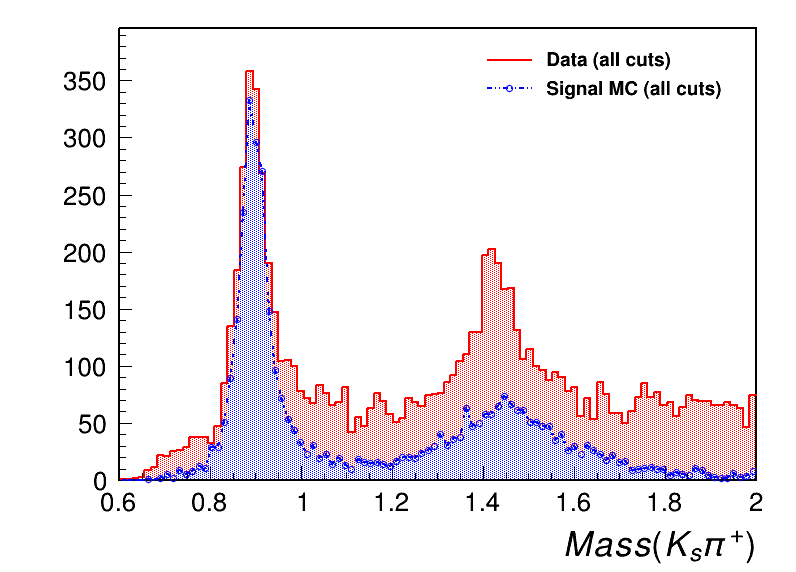

Metadata: Spring & Fall 2018. FSFlat.  B4__M16_M18
    CREATING HISTOGRAM... FSRootHist:000022   OKAY           (entries = 11751)
    CREATING HISTOGRAM... FSRootHist:000023   OKAY           (entries = 5468)


Info in <TCanvas::Print>: pdf file plots/KsPip_m_DATA-MC_man-t.pdf has been created
Info in <TCanvas::Print>: png file plots/KsPip_m_DATA-MC_man-t.png has been created


In [17]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Data: \gamma p \\rightarrow K_{s} \pi^{+} \Lambda'
axisLabel = 'Mass (K_{s} \pi^{+})'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    gluex_style()
    # clear histogram cache
    ROOT.FSHistogram.clearHistogramCache() 
    
    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    ################################################################################################

    # FOR MULTIPLE FINAL STATES AND TO MANAGE PARTICLE COMBINATORICS WITHIN THOSE FINAL STATES.    
    # h1 = ROOT.FSModeHistogram.getTH1F(fileName, treeName, f"MASS({KPlus},{DecayingPi0},{Proton},{PiMinus})", "(80, 0.0, 4.0)", "", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak)&&CUTSB(constrainLambda)")

    ################################################################################################

    mass_kpi = f"MASS({DecayingKShort},{PiPlus1})"


    # h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort},{PiPlus1})", "(100, 0.3, 3.2)", "CUT()")
    # h2 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort},{PiPlus1})", "(100, 0.3, 3.2)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak)")
    # h3 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort},{PiPlus1})", "(100, 0.6, 2.00)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,flightSigLambda)")
    # h4 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort},{PiPlus1})", "(100, 0.6, 2.00)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,flightSigLambda,constrainKShort,constrainLambda)")
    h4 = ROOT.FSHistogram.getTH1F(fileName, treeName, mass_kpi, "(100, 0.6, 2.00)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,flightSigLambda,constrainKShort,constrainLambda)")
    hMC = ROOT.FSHistogram.getTH1F(MCfileName, treeName, f"MASS({DecayingKShort},{PiPlus1})", "(100, 0.6, 2.00)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,flightSigLambda,constrainKShort,constrainLambda)")
    # Tighter mass window (100, ?, ?)
    
    # h1.SetStats(False)
    # h1.SetMarkerColor(ROOT.kMagenta)
    # h1.SetMarkerStyle(4)
    # h1.SetMarkerSize(0.8)
    # h1.SetLineColor(ROOT.kMagenta)
    # h1.SetLineStyle(1)
    # h1.SetLineWidth(1)
    # h1.SetFillColor(ROOT.kMagenta)
    # h1.SetFillStyle(3002)
    # h1.GetXaxis().SetTitle(axisLabel)
    # h1.Draw('pl, hist')

    # h2.SetStats(False)
    # h2.SetLineColor(ROOT.kBlue)
    # h2.SetLineStyle(8)
    # h2.SetLineWidth(2)
    # h2.SetFillColor(ROOT.kBlue)
    # h2.SetFillStyle(3002)
    # h2.GetXaxis().SetTitle(axisLabel)
    # h2.Draw('same, hist')

    # h3.SetStats(False)
    # h3.SetMarkerColor(ROOT.kBlack)
    # h3.SetMarkerStyle(4)
    # h3.SetMarkerSize(0.8)
    # h3.SetLineColor(ROOT.kBlack)
    # h3.SetLineStyle(1)
    # h3.SetLineWidth(2)
    # h3.SetFillColor(920)
    # h3.SetFillStyle(302)
    # h3.GetXaxis().SetTitle(axisLabel)
    # h3.Draw("same,pl hist")

    h4.SetStats(False)
    h4.SetLineColor(ROOT.kRed)
    h4.SetLineStyle(1)
    h4.SetLineWidth(2)
    h4.SetFillColor(ROOT.kRed)
    h4.SetFillStyle(3002)
    h4.GetXaxis().SetTitle(axisLabel)
    h4.Draw("same, hist")

    hMC.SetStats(False)
    hMC.SetMarkerColor(ROOT.kBlue)
    hMC.SetMarkerStyle(4)
    hMC.SetMarkerSize(0.8)
    hMC.SetLineColor(ROOT.kBlue)
    hMC.SetLineStyle(8)
    hMC.SetLineWidth(2)
    hMC.SetFillColor(ROOT.kBlue)
    hMC.SetFillStyle(3002)
    hMC.GetXaxis().SetTitle(axisLabel)
    hMC.Draw("same, pl hist")
    hMC.Scale(0.70)

    legend1 = ROOT.TLegend(0.60, 0.82, 0.92, 0.92) # x_left, y_bottom, x_right, y_top
    # legend1.AddEntry(h1, ' Analysis launch cuts only', 'pl')
    # legend1.AddEntry(h2, ' Initial cuts', 'l')
    # legend1.AddEntry(h3, ' Initial, K_{s} & #Lambda flightSig', 'pl')
    # legend1.AddEntry(h4, ' Initial, K_{s} & #Lambda flightSig, K_{s} & #Lambda mass sel.', 'l')
    legend1.AddEntry(h4, ' Data (all cuts)', 'l')
    legend1.AddEntry(hMC, ' Signal MC (all cuts)', 'pl')
    legend1.Draw('same')

    img_path = 'plots/KsPip_m_DATA-MC_man-t'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')
    print('Metadata: ' + metaData)

plot_hist()

### ks-lamb

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = '\gamma p \\rightarrow K_{s} \pi^{+} \Lambda'
axisLabel = 'Mass (K_{s} #Lambda)'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    ROOT.FSHistogram.clearHistogramCache()

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)


    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort},{DecayingLambda})", "(100, 1.5, 2.5)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,constrainLambda,constrainKShort)")
    h2 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort},{DecayingLambda})", "(100, 1.5, 2.5)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,constrainLambda,constrainKShort,flightSigLambda,flightSigKShort)")

    h1.SetTitle("")
    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlack)
    h1.GetXaxis().SetTitle(axisLabel + '[GeV/c^{2}]')
    h1.GetYaxis().SetTitle('Events')

    h2.SetTitle("")
    h2.SetTitle(plotTitle)
    h2.SetStats(False)
    h2.SetLineColor(ROOT.kRed)
    h2.SetLineStyle(1)
    h2.GetXaxis().SetTitle(axisLabel + '[GeV/c^{2}]')
    h2.GetYaxis().SetTitle('Events')

    h1.Draw('hist')
    h2.Draw('hist')

    legend1 = ROOT.TLegend(0.25, 0.80, 0.60, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, 'initial cuts', 'l')
    legend1.AddEntry(h2, 'all cuts', 'l')
    legend1.Draw('same')

    img_path = 'plots/KsLamb_m'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### Pi Plus

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Data: \pi^{+} Mass (primary)'
axisLabel = 'Mass (\pi^{+}) [GeV/c^{2}]'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    gluex_style()
    # clear histogram cache
    ROOT.FSHistogram.clearHistogramCache() 
    
    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    # h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({PiPlus1})", "(80, 0.1, 0.2)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda,flightSigKShort)")

    # h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({PiPlus1})", "(80, 0.1, 0.2)", "CUT()")
    # h2 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({PiPlus1})", "(80, 0.1, 0.2)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak)")
    # h3 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({PiPlus1})", "(80, 0.1, 0.2)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda)")
    h4 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({PiPlus1})", "(80, 0.1, 0.2)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda,constrainLambda)")
    hMC = ROOT.FSHistogram.getTH1F(MCfileName, treeName, f"MASS({PiPlus1})", "(80, 0.1, 0.2)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda,constrainLambda)")
    # Tighter mass window (100, 1.078, 1.152)
    

    h4.SetStats(False)
    h4.SetLineColor(ROOT.kRed)
    h4.SetLineStyle(1)
    h4.SetLineWidth(2)
    h4.SetFillColor(ROOT.kRed)
    h4.SetFillStyle(3002)
    h4.GetXaxis().SetTitle(axisLabel)
    h4.Draw("hist")

    hMC.SetStats(False)
    hMC.SetMarkerColor(ROOT.kBlue)
    hMC.SetMarkerStyle(4)
    hMC.SetMarkerSize(0.8)
    hMC.SetLineColor(ROOT.kBlue)
    hMC.SetLineStyle(8)
    hMC.SetLineWidth(2)
    hMC.SetFillColor(ROOT.kBlue)
    hMC.SetFillStyle(3002)
    hMC.GetXaxis().SetTitle(axisLabel)
    hMC.Draw("same, pl hist")
    hMC.Scale(2.79)

    legend1 = ROOT.TLegend(0.67, 0.82, 0.92, 0.92) # x_left, y_bottom, x_right, y_top
    # legend1.AddEntry(h1, ' Analysis launch cuts only', 'pl')
    # legend1.AddEntry(h2, ' Initial cuts', 'l')
    # legend1.AddEntry(h3, ' Initial, #Lambda flightSig', 'pl')
    # legend1.AddEntry(h4, ' Initial, #Lambda flightSig, #Lambda mass sel.', 'l')
    legend1.AddEntry(h4, ' Data (all cuts)', 'l')
    legend1.AddEntry(hMC, ' Signal MC (all cuts)', 'pl')
    legend1.Draw('same')

    img_path = 'plots/PiPlus_m_DATA-MC'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### FSModeHistogram ...

In [ ]:
#  bggen, plot, but use "FSModeHistogram" instead of "FSHistogram"

# kvin 3/4/25

### Target proton

In [ ]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
latex = ROOT.TLatex()

plotTitle = 'Target proton mass'
axisLabel = 'Mass (target proton) [GeV/c^{2}]'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({?????})", "(80, 0.0, 4.0)", "")
    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.GetYaxis().SetTitle('Events')
    h1.Draw()
    latex.DrawLatexNDC(0.3, 0.95, plotTitle)
    
    legend1 = ROOT.TLegend(0.7, 0.9, 0.9, 0.85)
    legend1.AddEntry(h1, f'{plotTitle} no cuts', 'l')
    legend1.Draw('same')

    img_path = 'plots/target_m_m'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### KShort Pi Plus Lambda

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Mass (K_{s} \pi^{+} #Lambda)'
axisLabel = 'Mass (K_{s} \pi^{+} p \pi^{-})'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort},{PiPlus1},{Proton},{PiMinus2})", "(80, 2.5, 4.8)", "")

    # FOR MULTIPLE FINAL STATES AND TO MANAGE PARTICLE COMBINATORICS WITHIN THOSE FINAL STATES.    
    # h1 = ROOT.FSModeHistogram.getTH1F(fileName, treeName, f"MASS({KPlus},{DecayingPi0},{Proton},{PiMinus})", "(80, 0.0, 4.0)", "", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak)&&CUTSB(constrainLambda)")
    
    h1.SetTitle("")
    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel + ' [GeV/c^{2}]')
    h1.GetYaxis().SetTitle('Events')
    h1.Draw('hist')
    
    legend1 = ROOT.TLegend(0.60, 0.80, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, plotTitle + ' no cuts', 'l')
    legend1.Draw('same')

    img_path = 'plots/KsPipLamb_m'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

## 2D plots

### Dalitz

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = '\gamma p \\rightarrow K_{s} \pi^{+} \Lambda'
YaxisLabel = 'M(\pi^{+} \pi^{-} \pi^{+})^{2} [GeV]^{2}]'
XaxisLabel = 'M(p \pi^{-} \pi^{+})^{2} [GeV]^{2}]'

# INDICES ASSIGNED BY flatten.  Use leading values, not those in parentheses.
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    gluex_style()
    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    ROOT.FSHistogram.clearHistogramCache() 
    
    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    # old hist. replaced with h1 bewlow.
    # h1 = ROOT.FSHistogram.getTH2F(fileName, treeName, f"MASS2({DecayingKShort},{PiPlus1}):MASS2({DecayingLambda},{PiPlus1})", "(80, 1.6, 2.6, 80, 0.6, 5.2)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,constrainLambda,constrainKShort)") # MASS2(y-axis1,y-axis2):MASS2(x-axis1,x-axis2), "x_bins, x_min, x_max, y_bins, y_min, y_max"
    

    h1 = ROOT.FSHistogram.getTH2F(fileName, treeName, f"MASS2({DecayingKShort},{PiPlus1}):MASS2({DecayingLambda},{PiPlus1})", "(100, 0.0, 14.0, 100, 0.0, 9.0)", "CUT()") # MASS2(y-axis1,y-axis2):MASS2(x-axis1,x-axis2), "x_bins, x_min, x_max, y_bins, y_min, y_max"
    # h1 = ROOT.FSHistogram.getTH2F(fileName, treeName, f"MASS2({DecayingKShort},{PiPlus1}):MASS2({DecayingLambda},{PiPlus1})", "(100, 0.0, 14.0, 100, 0.0, 9.0)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,constrainKShort,constrainLambda)")
    # h1 = ROOT.FSHistogram.getTH2F(fileName, treeName, f"MASS2({DecayingKShort},{PiPlus1}):MASS2({DecayingLambda},{PiPlus1})", "(100, 0.0, 14.0, 100, 0.0, 9.0)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,flightSigLambda)")
    # h1 = ROOT.FSHistogram.getTH2F(fileName, treeName, f"MASS2({DecayingKShort},{PiPlus1}):MASS2({DecayingLambda},{PiPlus1})", "(100, 0.0, 14.0, 100, 0.0, 9.0)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,flightSigLambda,constrainKShort,constrainLambda)")
    # hMC = ROOT.FSHistogram.getTH2F(MCfileName, treeName, f"MASS2({DecayingKShort},{PiPlus1}):MASS2({DecayingLambda},{PiPlus1})", "(100, 0.0, 14.0, 100, 0.0, 9.0)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,flightSigLambda,constrainKShort,constrainLambda)")
    # Tighter mass window (100, ?, ?)
    

    h1.SetStats(False)
    h1.GetXaxis().SetTitle(XaxisLabel)
    h1.GetYaxis().SetTitle(YaxisLabel)
    h1.Draw('colz')

    # hMC.SetStats(False)
    # hMC.GetXaxis().SetTitle(XaxisLabel)
    # hMC.GetYaxis().SetTitle(YaxisLabel)
    # hMC.Draw('colz')


    # legend1 = ROOT.TLegend(0.60, 0.82, 0.92, 0.92) # x_left, y_bottom, x_right, y_top
    # legend1.AddEntry(h1, ' Analysis launch cuts only', 'pl')
    # legend1.AddEntry(h1, ' Initial cuts', 'l')
    # legend1.AddEntry(h1, ' Initial, K_{s} & #Lambda flightSig', 'pl')
    # legend1.AddEntry(h1, ' Initial, K_{s} & #Lambda flightSig, K_{s} & #Lambda mass sel.', 'l')
    # legend1.AddEntry(h1, ' Data (all cuts)', 'l')
    # legend1.AddEntry(hMC, ' Signal MC (all cuts)', 'pl')
    # legend1.Draw('same')

    img_path = 'plots/KsPipVSLambPip_m2_initialCuts'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### 2D mass plots

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = '\gamma p \\rightarrow K_{s} \pi^{+} \Lambda'
YaxisLabel = 'M(K_{s} \pi^{+}) [GeV]'
XaxisLabel = 'M(#Lambda \pi^{+}) [GeV]'

# INDICES ASSIGNED BY flatten.  Use leading values, not those in parentheses.
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    gluex_style()
    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    ROOT.FSHistogram.clearHistogramCache() 
    
    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)
    canvas.SetRightMargin(.15)

    # old hist. replaced with h1 bewlow.
    # h1 = ROOT.FSHistogram.getTH2F(fileName, treeName, f"MASS2({DecayingKShort},{PiPlus1}):MASS2({DecayingLambda},{PiPlus1})", "(80, 1.6, 2.6, 80, 0.6, 5.2)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,constrainLambda,constrainKShort)") # MASS2(y-axis1,y-axis2):MASS2(x-axis1,x-axis2), "x_bins, x_min, x_max, y_bins, y_min, y_max"
    

    # h1 = ROOT.FSHistogram.getTH2F(fileName, treeName, f"MASS({DecayingKShort},{PiPlus1}):MASS({DecayingLambda},{PiPlus1})", "(100, 0.0, 14.0, 100, 0.0, 9.0)", "CUT()") # MASS2(y-axis1,y-axis2):MASS2(x-axis1,x-axis2), "x_bins, x_min, x_max, y_bins, y_min, y_max"
    # h1 = ROOT.FSHistogram.getTH2F(fileName, treeName, f"MASS({DecayingKShort},{PiPlus1}):MASS({DecayingLambda},{PiPlus1})", "(100, 0.0, 14.0, 100, 0.0, 9.0)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,constrainKShort,constrainLambda)")
    h1 = ROOT.FSHistogram.getTH2F(fileName, treeName, f"MASS({DecayingKShort},{PiPlus1}):MASS({DecayingLambda},{PiPlus1})", "(100, 1.0, 4.0, 100, 0.2, 3.5)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak)")
    # h1 = ROOT.FSHistogram.getTH2F(fileName, treeName, f"MASS({DecayingKShort},{PiPlus1}):MASS({DecayingLambda},{PiPlus1})", "(100, 1.00, 4.0, 100, 0.6, 2.4)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,flightSigLambda)")
    # hMC = ROOT.FSHistogram.getTH2F(MCfileName, treeName, f"MASS({DecayingKShort},{PiPlus1}):MASS({DecayingLambda},{PiPlus1})", "(100, 1.00, 4.0, 100, 0.6, 2.4)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak)")
    # Tighter mass window (100, ?, ?)
    

    h1.SetStats(False)
    h1.GetXaxis().SetTitle(XaxisLabel)
    h1.GetYaxis().SetTitle(YaxisLabel)
    h1.Draw('colz')

    # hMC.SetStats(False)
    # hMC.GetXaxis().SetTitle(XaxisLabel)
    # hMC.GetYaxis().SetTitle(YaxisLabel)
    # hMC.Draw('colz')


    # legend1 = ROOT.TLegend(0.60, 0.82, 0.92, 0.92) # x_left, y_bottom, x_right, y_top
    # legend1.AddEntry(h1, ' Analysis launch cuts only', 'pl')
    # legend1.AddEntry(h1, ' Initial cuts', 'l')
    # legend1.AddEntry(h1, ' Initial, K_{s} & #Lambda flightSig', 'pl')
    # legend1.AddEntry(h1, ' Initial, K_{s} & #Lambda flightSig, K_{s} & #Lambda mass sel.', 'l')
    # legend1.AddEntry(h1, ' Data (all cuts)', 'l')
    # legend1.AddEntry(hMC, ' Signal MC (all cuts)', 'pl')
    # legend1.Draw('same')

    img_path = 'plots/KsPipVSLambPip_m_BASICCUTS-ONLY'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()